In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [7]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [8]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [9]:
gameX["mvar47"][0]

'C'

In [10]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])

leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [11]:
gameX["mvar47"].dtype

dtype('uint8')

# Synthesys begins

In [12]:
print(gameX.shape)
print(leaderX.shape)

gameX = gameX.assign(var345 = (1+gameX['mvar3'])*(1+gameX['mvar4'])*(1+gameX['mvar5']))
leaderX = leaderX.assign(var345 = (1+leaderX['mvar3'])*(1+leaderX['mvar4'])*(1+leaderX['mvar5']) )

print(gameX.shape)
print(leaderX.shape)

gameX  = gameX.assign(mvar678 = (gameX['mvar7'] + gameX['mvar8'])/(1+gameX['mvar6']))
leaderX = leaderX.assign(mvar678 = (leaderX['mvar7'] + leaderX['mvar8'])/(1+leaderX['mvar6']))

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp16 = df['mvar16'].copy()
temp16[temp16.isnull()] = -1
temp17 = df['mvar17'].copy()
temp17[temp17.isnull()] = -1
temp18 = df['mvar18'].copy()
temp18[temp18.isnull()] = -1


temp16 = temp16 + temp17+ temp18
temp16[temp16>0] = 0.5265
temp16[temp16==0] = 0.1763
temp16[temp16==-1] = 0.2594
temp16[temp16==-2] = 0.2594
temp16[temp16==-3] = 0.4423

df = df.assign(var161718 = temp16)

gameX = df.copy()


df = leaderX.copy()

temp16 = df['mvar16'].copy()
temp16[temp16.isnull()] = -1
temp17 = df['mvar17'].copy()
temp17[temp17.isnull()] = -1
temp18 = df['mvar18'].copy()
temp18[temp18.isnull()] = -1


temp16 = temp16 + temp17+ temp18
temp16[temp16>0] = 0.5265
temp16[temp16==0] = 0.1763
temp16[temp16==-1] = 0.2594
temp16[temp16==-2] = 0.2594
temp16[temp16==-3] = 0.4423

df = df.assign(var161718 = temp16)

leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

gameX = gameX.assign(var2223 = gameX['mvar23'] - gameX['mvar22'])
leaderX = leaderX.assign(var2223 = leaderX['mvar23'] - leaderX['mvar22'])

print(gameX.shape)
print(leaderX.shape)



df = gameX.copy()

temp26 = df['mvar26'].copy()
temp26[temp26.isnull()] = -365
temp27 = df['mvar27'].copy()
temp27[temp27.isnull()] = -365

temp26 = (temp26+temp27)/2/365
temp26 = temp26.astype('int64')

temp26[(temp26>=0) & (temp26<=5)] = 0.3243
temp26[temp26>5] = 0.1562
temp26[temp26<0] = 0.4026

df = df.assign(var2627 = temp26)
gameX = df.copy()

df = leaderX.copy()

temp26 = df['mvar26'].copy()
temp26[temp26.isnull()] = -365
temp27 = df['mvar27'].copy()
temp27[temp27.isnull()] = -365

temp26 = (temp26+temp27)/2/365
temp26 = temp26.astype('int64')

temp26[(temp26>=0) & (temp26<=5)] = 0.3243
temp26[temp26>5] = 0.1562
temp26[temp26<0] = 0.4026

df = df.assign(var2627 = temp26)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp28 = df['mvar28'].copy()
temp28[temp28.isnull()] = -365

temp28 = temp28/365
temp28 = temp28.astype('int64')

temp28[temp28!=0] = 0.1231
temp28[temp28==0] = 0.3605

df = df.assign(var28 = temp28)
gameX = df.copy()


df = leaderX.copy()

temp28 = df['mvar28'].copy()
temp28[temp28.isnull()] = -365

temp28 = temp28/365
temp28 = temp28.astype('int64')

temp28[temp28!=0] = 0.1231
temp28[temp28==0] = 0.3605

df = df.assign(var28 = temp28)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()
df = df.assign(var3031 = df[["mvar30", "mvar31"]].max(axis=1))
gameX = df.copy()

df = leaderX.copy()
df = df.assign(var3031 = df[["mvar30", "mvar31"]].max(axis=1))
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp33 = df['mvar33'].copy()
temp33[temp33.isnull()] = -5

temp33 = temp33/5
temp33 = temp33.astype('int64')

temp33[temp33<0] = 0.3118
temp33[temp33==1] = 0.2138
temp33[temp33>1] = 0.1601
temp33[temp33==0] = 0.2959

df = df.assign(var33 = temp33)
gameX = df.copy()


df = leaderX.copy()

temp33 = df['mvar33'].copy()
temp33[temp33.isnull()] = -5

temp33 = temp33/5
temp33 = temp33.astype('int64')

temp33[temp33<0] = 0.3118
temp33[temp33==1] = 0.2138
temp33[temp33>1] = 0.1601
temp33[temp33==0] = 0.2959

df = df.assign(var33 = temp33)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp34 = df['mvar34'].copy()
temp34[temp34.isnull()] = -1

temp34[temp34==0] = 0.2151
temp34[temp34==-1] = 0.2151
temp34[temp34==1] = 0.3589
temp34[temp34==2] = 0.4459
temp34[temp34>2] = 0.5641

df = df.assign(var34 = temp34)
gameX = df.copy()


df = leaderX.copy()

temp34 = df['mvar34'].copy()
temp34[temp34.isnull()] = -1

temp34[temp34==0] = 0.2151
temp34[temp34==-1] = 0.2151
temp34[temp34==1] = 0.3589
temp34[temp34==2] = 0.4459
temp34[temp34>2] = 0.5641

df = df.assign(var34 = temp34)
leaderX = df.copy()



print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp35 = df['mvar35'].copy()
temp35[temp35.isnull()] = -1

temp35[temp35>0] = 0.5137
temp35[temp35==0] = 0.1878
temp35[temp35==-1] = 0.2623

df = df.assign(var35 = temp35)
gameX = df.copy()


df = leaderX.copy()

temp35 = df['mvar35'].copy()
temp35[temp35.isnull()] = -1

temp35[temp35>0] = 0.5137
temp35[temp35==0] = 0.1878
temp35[temp35==-1] = 0.2623

df = df.assign(var35 = temp35)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

#mvar36, 37, 38

df = gameX.copy()

temp36 = df['mvar36'].copy()

temp36[temp36.isnull()] = -1

temp36[temp36==1] = 0.163769
temp36[temp36==2] = 0.170170
temp36[temp36==3] = 0.190171
temp36[temp36==4] = 0.211005
temp36[temp36==5] = 0.226932
temp36[temp36==6] = 0.247148
temp36[temp36==7] = 0.271086
temp36[temp36==8] = 0.296529
temp36[temp36==9] = 0.309190
temp36[temp36==10] = 0.323132
temp36[temp36==11] = 0.330296
temp36[temp36==12] = 0.33815
temp36[temp36==13] = 0.352103
temp36[temp36==14] = 0.370433
temp36[temp36==15] = 0.365985
temp36[temp36==16] = 0.384926
temp36[temp36==17] = 0.395310
temp36[temp36==18] = 0.449219
temp36[temp36==19] = 0.425926
temp36[temp36<0] = 0.176674
temp36[temp36>=20] = 0.4647

df = df.assign(var36 = temp36)
gameX = df.copy()



df = leaderX.copy()

temp36 = df['mvar36'].copy()

temp36[temp36.isnull()] = -1

temp36[temp36==1] = 0.163769
temp36[temp36==2] = 0.170170
temp36[temp36==3] = 0.190171
temp36[temp36==4] = 0.211005
temp36[temp36==5] = 0.226932
temp36[temp36==6] = 0.247148
temp36[temp36==7] = 0.271086
temp36[temp36==8] = 0.296529
temp36[temp36==9] = 0.309190
temp36[temp36==10] = 0.323132
temp36[temp36==11] = 0.330296
temp36[temp36==12] = 0.33815
temp36[temp36==13] = 0.352103
temp36[temp36==14] = 0.370433
temp36[temp36==15] = 0.365985
temp36[temp36==16] = 0.384926
temp36[temp36==17] = 0.395310
temp36[temp36==18] = 0.449219
temp36[temp36==19] = 0.425926
temp36[temp36<0] = 0.176674
temp36[temp36>=20] = 0.4647

df = df.assign(var36 = temp36)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
gameX = df.copy()



df = leaderX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp38 = df['mvar38'].copy()

temp38[temp38.isnull()] = -1

temp38[temp38<0] = 0.215139
temp38[temp38==0] = 0.145566
temp38[temp38==1] = 0.176224
temp38[temp38==2] = 0.200382
temp38[temp38==3] = 0.232083
temp38[temp38==4] = 0.252492
temp38[temp38==5] = 0.275282
temp38[temp38==6] = 0.297332
temp38[temp38==7] = 0.298409
temp38[temp38==8] = 0.328731
temp38[temp38==9] = 0.342270
temp38[temp38>=10] = 0.3907

df = df.assign(var38 = temp38)
gameX = df.copy()



df = leaderX.copy()

temp38 = df['mvar38'].copy()

temp38[temp38.isnull()] = -1

temp38[temp38<0] = 0.215139
temp38[temp38==0] = 0.145566
temp38[temp38==1] = 0.176224
temp38[temp38==2] = 0.200382
temp38[temp38==3] = 0.232083
temp38[temp38==4] = 0.252492
temp38[temp38==5] = 0.275282
temp38[temp38==6] = 0.297332
temp38[temp38==7] = 0.298409
temp38[temp38==8] = 0.328731
temp38[temp38==9] = 0.342270
temp38[temp38>=10] = 0.3907

df = df.assign(var38 = temp38)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

gameX = gameX.assign(var363738 = (gameX['mvar36']*gameX['mvar37']/(1+gameX['mvar38'])) )
leaderX = leaderX.assign(var363738 = (leaderX['mvar36']*leaderX['mvar37']/(1+leaderX['mvar38']) ) )

print(gameX.shape)
print(leaderX.shape)



#mvar39
df = gameX.copy()

temp39 = df['mvar35'].copy()
temp39[temp39.isnull()] = -1

temp39[temp39>0] = 0.4925
temp39[temp39==0] = 0.2109
temp39[temp39==-1] = 0.4390

df = df.assign(var39 = temp39)
gameX = df.copy()


df = leaderX.copy()

temp39 = df['mvar35'].copy()
temp39[temp39.isnull()] = -1

temp39[temp39>0] = 0.4925
temp39[temp39==0] = 0.2109
temp39[temp39==-1] = 0.4390

df = df.assign(var39 = temp39)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp40 = df['mvar40'].copy()
temp40[temp40.isnull()] = -50
temp40 = temp40/50
temp40 = temp40.round(0)

temp40[temp40>=2] = 0.375
temp40[temp40==1] = 0.1643
temp40[temp40==0] = 0.1540
temp40[temp40<0] = 0.2199

df = df.assign(var40 = temp40)
gameX = df.copy()


df = leaderX.copy()

temp40 = df['mvar40'].copy()
temp40[temp40.isnull()] = -50
temp40 = temp40/50
temp40 = temp40.round(0)

temp40[temp40>=2] = 0.375
temp40[temp40==1] = 0.1643
temp40[temp40==0] = 0.1540
temp40[temp40<0] = 0.2199

df = df.assign(var40 = temp40)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp41 = df['mvar41'].copy()
temp41[temp41.isnull()] = -25
temp41 = temp41/25
temp41 = temp41.round(0)

temp41[temp41>=4] = 0.3000
temp41[temp41==3] = 0.2231
temp41[ (temp41==2) | (temp41==1) | (temp41==0)] = 0.1610
temp41[temp41<0] = 0.2526

df = df.assign(var41 = temp41)
gameX = df.copy()


df = leaderX.copy()

temp41 = df['mvar41'].copy()
temp41[temp41.isnull()] = -25
temp41 = temp41/25
temp41 = temp41.round(0)

temp41[temp41>=4] = 0.3000
temp41[temp41==3] = 0.2231
temp41[ (temp41==2) | (temp41==1) | (temp41==0)] = 0.1610
temp41[temp41<0] = 0.2526

df = df.assign(var41 = temp41)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp45 = df['mvar45'].copy()
temp45[temp45.isnull()] = -1

temp45[temp45>0] = 0.3481
temp45[temp45==0] = 0.1268
temp45[temp45<0] = 0.3281

df = df.assign(var45 = temp45)
gameX = df.copy()


df = leaderX.copy()

temp45 = df['mvar45'].copy()
temp45[temp45.isnull()] = -1

temp45[temp45>0] = 0.3481
temp45[temp45==0] = 0.1268
temp45[temp45<0] = 0.3281

df = df.assign(var45 = temp45)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp46 = df['mvar46'].copy()
temp46[temp46.isnull()] = -1

temp46[temp46>0] = 0.4979
temp46[temp46==0] = 0.2010
temp46[temp46<0] = 0.2968

df = df.assign(var46 = temp46)
gameX = df.copy()



df = leaderX.copy()

temp46 = df['mvar46'].copy()
temp46[temp46.isnull()] = -1

temp46[temp46>0] = 0.4979
temp46[temp46==0] = 0.2010
temp46[temp46<0] = 0.2968

df = df.assign(var46 = temp46)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)




(80000, 47)
(25000, 47)
(80000, 48)
(25000, 48)
(80000, 49)
(25000, 49)
(80000, 50)
(25000, 50)
(80000, 51)
(25000, 51)
(80000, 52)
(25000, 52)
(80000, 53)
(25000, 53)
(80000, 54)
(25000, 54)
(80000, 55)
(25000, 55)
(80000, 56)
(25000, 56)
(80000, 57)
(25000, 57)
(80000, 58)
(25000, 58)
(80000, 59)
(25000, 59)
(80000, 60)
(25000, 60)
(80000, 61)
(25000, 61)
(80000, 62)
(25000, 62)
(80000, 63)
(25000, 63)
(80000, 64)
(25000, 64)
(80000, 65)
(25000, 65)
(80000, 66)
(25000, 66)


In [ ]:
#drop
df = gameX.copy() 
leader_df = leaderX.copy()
drop_target = ['mvar27']
#number of misssing values
# for i in df.columns:
#     if (100*(80000-gameDf[i].describe()['count'])/80000) > 

In [ ]:
for i in drop_target:
    del df[i]
    del leader_df[i]

In [ ]:
leader_df.columns

In [ ]:
gameX = df
leaderX = leader_df 

# Synthesis Ends

In [13]:
print(gameX.shape)
print(leaderX.shape)

(80000, 66)
(25000, 66)


In [14]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,var35,var36,var37,var38,var363738,var39,var40,var41,var45,var46
0,1753.0,0.500100,0.000,0.0000,0.000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,0.1878,0.190171,0.090400,0.176224,16.500000,0.2109,0.2199,0.1610,0.3281,0.2010
1,1894.0,1.970100,0.000,0.0000,0.000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,0.1878,0.190171,0.090400,0.232083,9.000000,0.2109,0.2199,0.2231,0.1268,0.2010
2,1774.0,0.171800,0.000,0.0000,0.000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,0.2623,0.190171,0.159852,0.176224,6.000000,0.4390,0.2199,0.2231,0.1268,0.2010
3,1586.0,0.112300,5.299,0.0000,0.000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,0.2623,0.163769,0.381028,0.176224,0.000000,0.4390,0.2199,0.2526,0.3281,0.2968
4,1832.0,1.444200,0.000,0.0000,0.000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,0.2623,0.395310,0.381028,0.232083,0.000000,0.4390,0.3750,0.2231,0.1268,0.2010
5,1838.0,0.054400,0.241,0.0000,0.000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,0.2623,0.370433,0.090400,0.252492,53.200000,0.4390,0.2199,0.2231,0.1268,0.2010
6,1743.0,1.075300,0.272,0.0000,0.000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,0.1878,0.296529,0.102641,0.297332,10.285714,0.2109,0.2199,0.2231,0.1268,0.2010
7,1935.0,0.560100,0.000,0.0000,0.000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,0.1878,0.271086,0.090400,0.342270,7.000000,0.2109,0.2199,0.2526,0.1268,0.2010
8,1885.0,0.081100,0.000,0.0000,0.000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,0.1878,0.170170,0.186923,0.176224,3.000000,0.2109,0.2199,0.2526,0.1268,0.2968
9,1730.0,0.744400,0.000,0.0000,0.000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,0.1878,0.247148,0.309995,0.342270,0.600000,0.2109,0.2199,0.2526,0.3281,0.2010


In [24]:
#BREAK OPEN

In [25]:
#Method 3

In [26]:
#current

In [49]:
import xgboost as xgb
import time


dtrain = xgb.DMatrix(gameX, gameY)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]

print('running cross validation')

print('running cross validation, with preprocessing function')
# define the preprocessing function
# used to return the preprocessed training, test data, and parameter
# we can use this to do weight rescale, etc.
# as a example, we try to set scale_pos_weight
def fpreproc(dtrain, dtest, param):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label == 1)
    param['scale_pos_weight'] = ratio
    return (dtrain, dtest, param)

# do cross validation, for each fold
# the dtrain, dtest, param will be passed into fpreproc
# then the return value of fpreproc will be used to generate
# results of that fold

###
# you can also do cross validation with customized loss function
# See custom_objective.py
##
print('running cross validation, with cutomsized loss function')
#Custom
# wt = 0.5
# def logregobj(preds, dtrain):
#     labels = dtrain.get_label()
#     preds = 1.0 / (1.0 + np.exp(-preds))
#     grad = wt*(1.0-labels)*preds - (1-wt)*labels*(1-preds)
#     hess = preds * (1.0 - preds) * (wt*(1.0-labels)+(1.0-wt)*labels)
#     return grad, hess

def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 1, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

t = time.time()
# CV to find optimum number of boosted trees (num_round)
cvresult = xgb.cv(
            param, #param set by user
            dtrain, #train set
            num_round, #max number of boosted tree, >early_stopping_round
            nfold=n_fold, #n fold CV
            seed=0, 
            obj=logregobj, #custom loss func
            feval=evalerror, #custom eval metric
            callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                       xgb.callback.early_stop(early_stopping_rounds)], #decides optimum number of boosted trees, <num_round
#             fpreproc=fpreproc, #function for preprocessing
            )

num_round = cvresult.shape[0] #optimum number of boosted trees
# bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror, fpreproc=fpreproc)
bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror)

print("time taken:", time.time()-t)

running cross validation
running cross validation, with preprocessing function
running cross validation, with cutomsized loss function
[0]	train-error:0.753787	test-error:0.753787
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 50 rounds.
[1]	train-error:0.753787	test-error:0.753787
[2]	train-error:0.36955	test-error:0.371713
[3]	train-error:0.284816	test-error:0.286575
[4]	train-error:0.245163	test-error:0.247437
[5]	train-error:0.212703	test-error:0.215738
[6]	train-error:0.207472	test-error:0.21025
[7]	train-error:0.204878	test-error:0.207387
[8]	train-error:0.203591	test-error:0.205487
[9]	train-error:0.202441	test-error:0.204887
[10]	train-error:0.201412	test-error:0.203575
[11]	train-error:0.200553	test-error:0.2029
[12]	train-error:0.200172	test-error:0.202337
[13]	train-error:0.200022	test-error:0.201687
[14]	train-error:0.199413	test-error:0.201137
[15]	train-error:0.199253	test-error:0.20118

[173]	train-error:0.175697	test-error:0.190688
[174]	train-error:0.175644	test-error:0.190588
[175]	train-error:0.175528	test-error:0.190725
[176]	train-error:0.175387	test-error:0.190775
[177]	train-error:0.175337	test-error:0.190787
[178]	train-error:0.175275	test-error:0.19095
[179]	train-error:0.175141	test-error:0.1908
[180]	train-error:0.175025	test-error:0.190787
[181]	train-error:0.174984	test-error:0.1909
[182]	train-error:0.175041	test-error:0.190862
[183]	train-error:0.174965	test-error:0.19085
[184]	train-error:0.174937	test-error:0.190712
[185]	train-error:0.174797	test-error:0.190825
[186]	train-error:0.174741	test-error:0.190938
[187]	train-error:0.174666	test-error:0.191
[188]	train-error:0.174609	test-error:0.190937
[189]	train-error:0.174613	test-error:0.190887
[190]	train-error:0.174525	test-error:0.190937
[191]	train-error:0.174428	test-error:0.191025
[192]	train-error:0.174303	test-error:0.1911
[193]	train-error:0.174294	test-error:0.19125
[194]	train-error:0.17419

[135]	eval-error:0.18075	train-error:0.18075
[136]	eval-error:0.180613	train-error:0.180613
[137]	eval-error:0.180537	train-error:0.180537
[138]	eval-error:0.180663	train-error:0.180663
[139]	eval-error:0.180537	train-error:0.180537
[140]	eval-error:0.18045	train-error:0.18045
[141]	eval-error:0.180537	train-error:0.180537
[142]	eval-error:0.180512	train-error:0.180512
[143]	eval-error:0.18045	train-error:0.18045
[144]	eval-error:0.180537	train-error:0.180537
[145]	eval-error:0.1804	train-error:0.1804
[146]	eval-error:0.18035	train-error:0.18035
[147]	eval-error:0.180388	train-error:0.180388
[148]	eval-error:0.1804	train-error:0.1804
[149]	eval-error:0.18025	train-error:0.18025
[150]	eval-error:0.18015	train-error:0.18015
[151]	eval-error:0.180025	train-error:0.180025
[152]	eval-error:0.179838	train-error:0.179838
[153]	eval-error:0.179762	train-error:0.179762
[154]	eval-error:0.179613	train-error:0.179613
[155]	eval-error:0.17965	train-error:0.17965
[156]	eval-error:0.179675	train-err

In [15]:
#910k
import xgboost as xgb
import time


dtrain = xgb.DMatrix(gameX, gameY)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]


def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)


param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1.5, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 0.25, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

num_round = 231

bst = xgb.train(param, dtrain, num_round, obj=logregobj, feval=evalerror)

/home/ekka/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


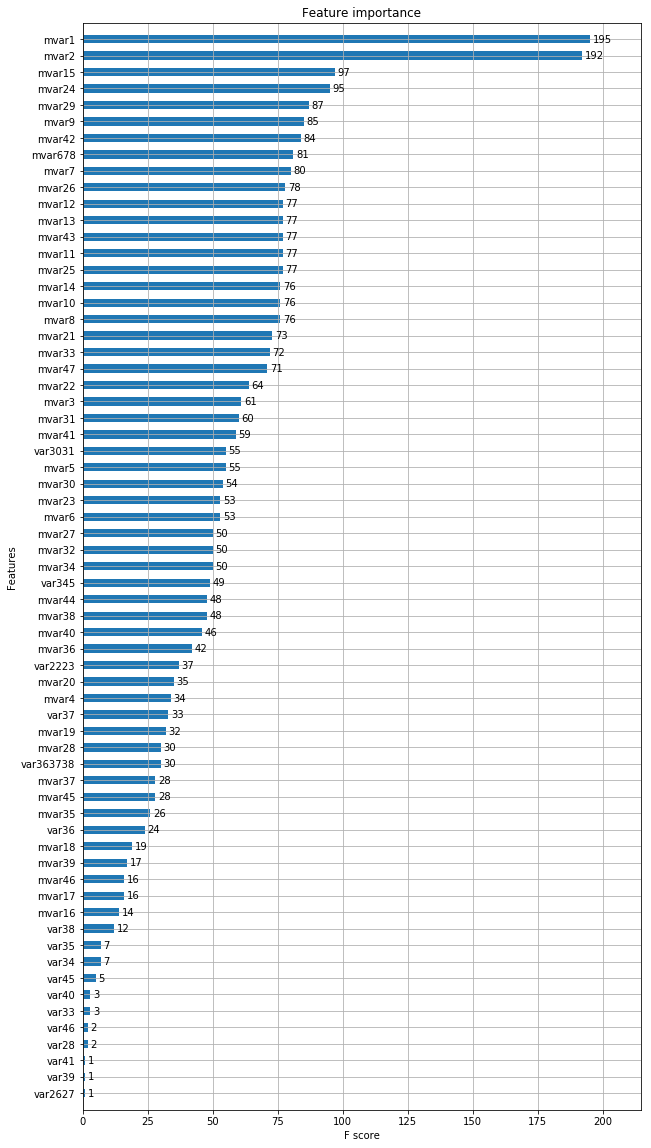

In [30]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,20)
plt.show()

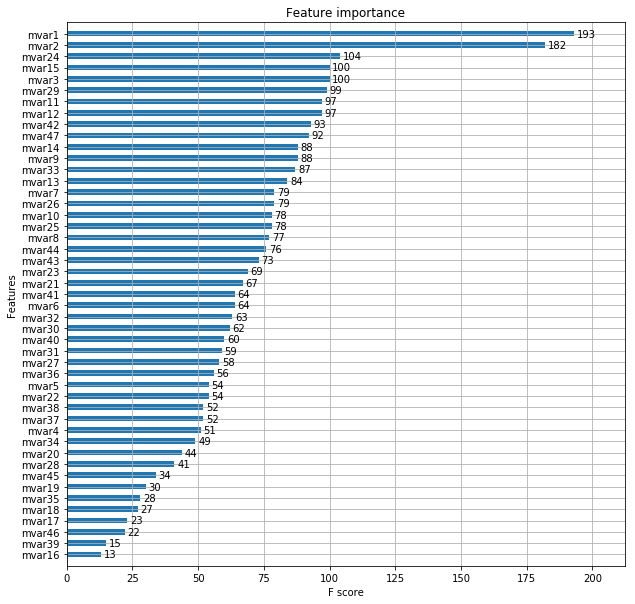

In [31]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

In [65]:
cvresult.shape[0]

166

In [17]:
bst.predict(dtrain)

array([-0.80279839, -2.42240548, -1.00476098, ...,  1.03145206,
       -1.72268009, -0.39294541], dtype=float32)

In [18]:
1/(1+np.exp(-bst.predict(dtrain)))

array([ 0.30942723,  0.08148005,  0.26800638, ...,  0.73719734,
        0.15152627,  0.40300846], dtype=float32)

In [19]:
dtest = xgb.DMatrix(leaderX)
# pred = bst.predict(leaderXxgb)

In [20]:
pred = 1/(1+np.exp(-bst.predict(dtest)))

In [21]:
pred = pd.DataFrame(pred)
pred['application_key'] = leaderAppID
pred.shape

(25000, 2)

In [22]:
pred

,0,application_key
0,0.046387,350053
1,0.056530,350054
2,0.163575,350055
3,0.636362,350056
4,0.163096,350057
5,0.013001,350058
6,0.066192,350059
7,0.004022,350060
8,0.005259,350061
9,0.270663,350062


In [23]:
pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = True) #true for xgb method3

In [24]:
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]

In [25]:
pred = pred.loc[:,'application_key':]

In [26]:
submit = pred['application_key'][:10000]
submit = pd.DataFrame(submit)
submit[0] = 0

In [27]:
# submit.iloc[-400:, 1] = 1

In [28]:
submit

,application_key,0
22292,372345,0
11416,361469,0
3708,353761,0
2760,352813,0
10881,360934,0
8922,358975,0
8084,358137,0
20330,370383,0
22865,372918,0
193,350246,0


In [29]:
submit.to_csv('flabbergasted_IITGuwahati_282.csv',header = False, index = False)